In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# 使用iris植物数据库
from sklearn.datasets import load_iris
# SEED保证可以复现
SEED = 2017

In [71]:
#将导入的数据分组
iris = load_iris()
idxs = np.where(iris.target<2)
X = iris.data[idxs]
y = iris.target[idxs]
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

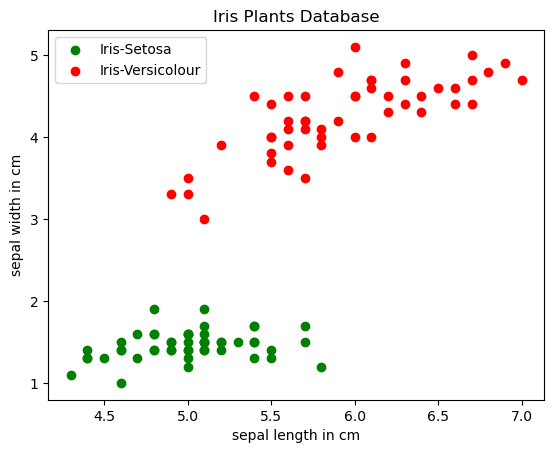

In [72]:
# 绘制四个变量中两个变量的数据展示
plt.scatter(X[y==0][:,0],X[y==0][:,2],color='green',label='Iris-Setosa')
plt.scatter(X[y==1][:,0],X[y==1][:,2],color='red',label='Iris-Versicolour')
plt.title('Iris Plants Database')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.legend()
plt.show()

In [73]:
# 分成数据集和测试集
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=SEED)

In [74]:
weights = np.random.normal(size=X_train.shape[1])
bias = 1

In [75]:
# 设置超参数
learning_rate = 0.1
n_epochs = 15

In [76]:
del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []

for i in range(n_epochs):
    # 使用阶跃函数，若输出大于0.5，则预测结果为1，否则为0
    output = np.where((X_train.dot(weights)+bias)>0.5,1,0)

    # 计算MSE
    error = np.mean((y_train-output)**2)

    #更新权值和偏置
    weights -= learning_rate * np.dot((output-y_train),X_train)
    bias += learning_rate * np.sum(np.dot((output-y_train),X_train))

    # 计算MSE
    loss = np.mean((output-y_train)**2)
    hist_loss.append(loss)

    #确定验证的精度
    output_val = np.where(X_val.dot(weights)>0.5,1,0)
    accuracy = np.mean(np.where(y_val==output_val,1,0))
    hist_accuracy.append(accuracy)
print(hist_loss)
print("-"*30)
print(hist_accuracy)

[0.5, 0.5, 0.45, 0.5, 0.5, 0.5, 0.5, 0.0125, 0.0125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
------------------------------
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


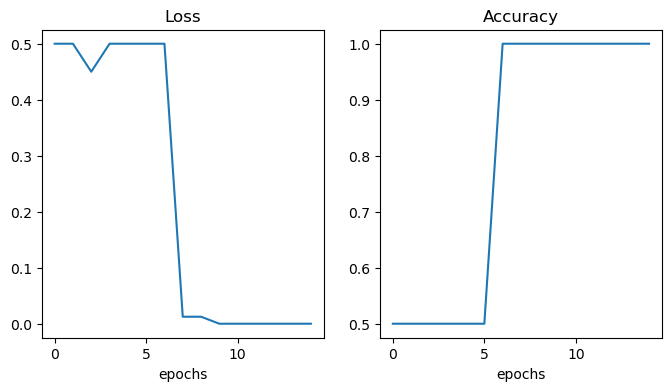

In [77]:
fig = plt.figure(figsize=(8,4))
a = fig.add_subplot(1,2,1)
imgplot = plt.plot(hist_loss)
plt.xlabel('epochs')
a.set_title('Loss')

a=fig.add_subplot(1,2,2)
imgplot = plt.plot(hist_accuracy)
plt.xlabel('epochs')
a.set_title('Accuracy')
plt.show()